In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/Zrmikstri/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 12355, done.
remote: Total 12355 (delta 0), reused 0 (delta 0), pack-reused 12355
Receiving objects: 100% (12355/12355), 12.78 MiB | 14.97 MiB/s, done.
Resolving deltas: 100% (8447/8447), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-ai-generativelanguage 0.4.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-api-core 2.11.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 3.20.1 which is incompatible.
google-cloud-aiplatfor

In [ ]:
import os
import cv2
import imutils
import torch
import glob

from google.colab.patches import cv2_imshow
from IPython.display import Image, display, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 2.1.0+cu121 (Tesla T4)


In [ ]:
from roboflow import Roboflow

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
rf = Roboflow(api_key="w8tvYodOoFXEneSiypNC")
project = rf.workspace("minh-nguyen-vu-anh").project("license-plate-detection-uqzqt")
dataset = project.version(2).download("yolov5")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/License-Plate-Detection-2 in yolov5pytorch:: 100%|██████████| 9162/9162 [00:02<00:00, 4251.57it/s]


In [ ]:
with open('/content/datasets/License-Plate-Detection-2/data.yaml','a+') as yamlfile:
        yamlfile.write('\ntest: /content/datasets/License-Plate-Detection-2/test/images')

In [ ]:
!python train.py --weights yolov5l.pt --img 640 --batch-size -1 --epochs 1000 --data {dataset.location}/data.yaml  --cache --project "/content/drive/MyDrive/Pro_Cs114" --name Save_RS


In [ ]:
!python train.py --resume /content/drive/MyDrive/Pro_Cs114/Save_RS4/weights/last.pt

2024-01-13 10:43:04.093084: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-13 10:43:04.093136: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-13 10:43:04.094465: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-13 10:43:05.150134: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/Pro_Cs114/Save_RS4/weights/last.pt, nosave=False, noval=False, noaut

In [ ]:
!python val.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --data {dataset.location}/data.yaml --task val --iou-thres 0.5


val: data=/content/datasets/License-Plate-Detection-2/data.yaml, weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
100% 755k/755k [00:00<00:00, 22.6MB/s]
val: Scanning '/content/datasets/License-Plate-Detection-2/valid/labels' images and labels...723 found, 0 missing, 0 empty, 0 corrupt: 100% 723/723 [00:00<00:00, 1001.21it/s]
val: New cache created: /content/datasets/License-Plate-Detection-2/valid/labels.cache
               Class     Images     Labels          P          R     mAP@.5    mAP@.75 mAP@.5:

PR_CURVE.PNG


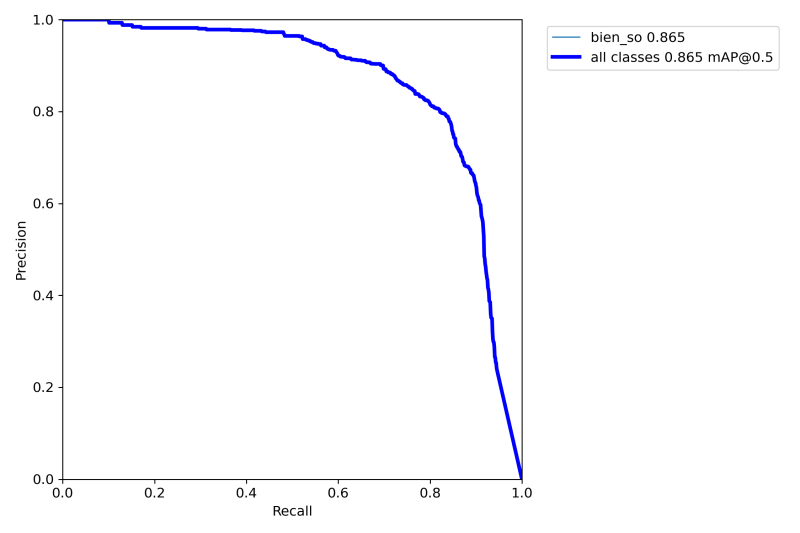





P_CURVE.PNG


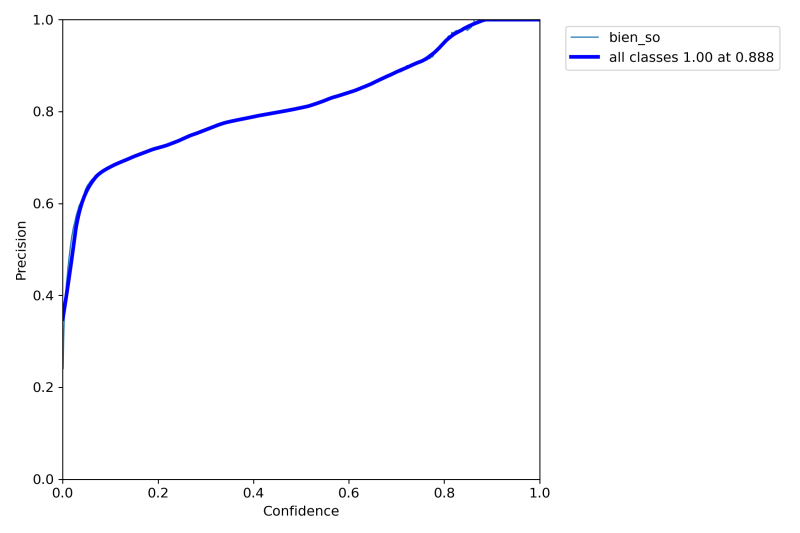





R_CURVE.PNG


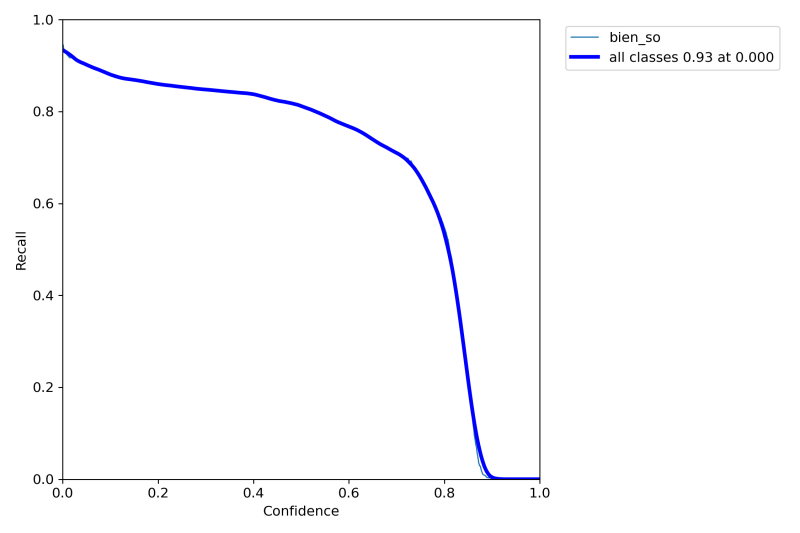





F1_CURVE.PNG


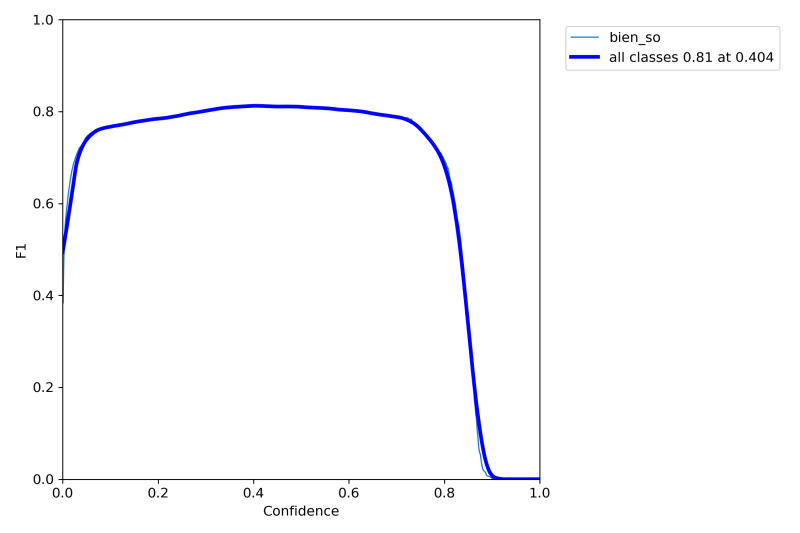





CONFUSION_MATRIX.PNG


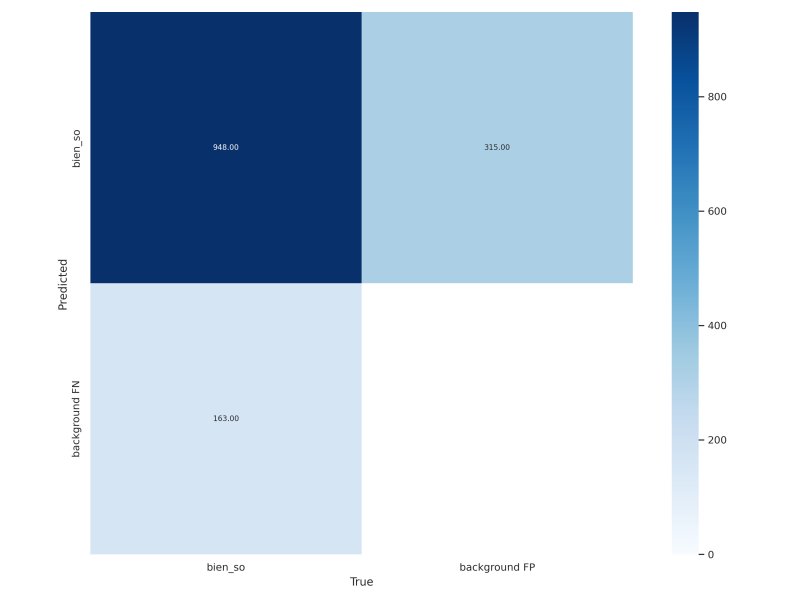

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/val/exp/*.png'):
    print(os.path.basename(imageName).upper())
    img = cv2.imread(imageName)
    img = imutils.resize(img, width=800)
    cv2_imshow(img)
    print('\n\n\n')

In [ ]:
!python val.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --data {dataset.location}/data.yaml --task test --iou-thres 0.5


val: data=/content/datasets/License-Plate-Detection-2/data.yaml, weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/datasets/License-Plate-Detection-2/test/labels' images and labels...500 found, 0 missing, 0 empty, 0 corrupt: 100% 500/500 [00:00<00:00, 1841.05it/s]
test: New cache created: /content/datasets/License-Plate-Detection-2/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5    mAP@.75 mAP@.5:.95:   0% 0/16 [00:00<?, ?it/s]WARNING

PR_CURVE.PNG


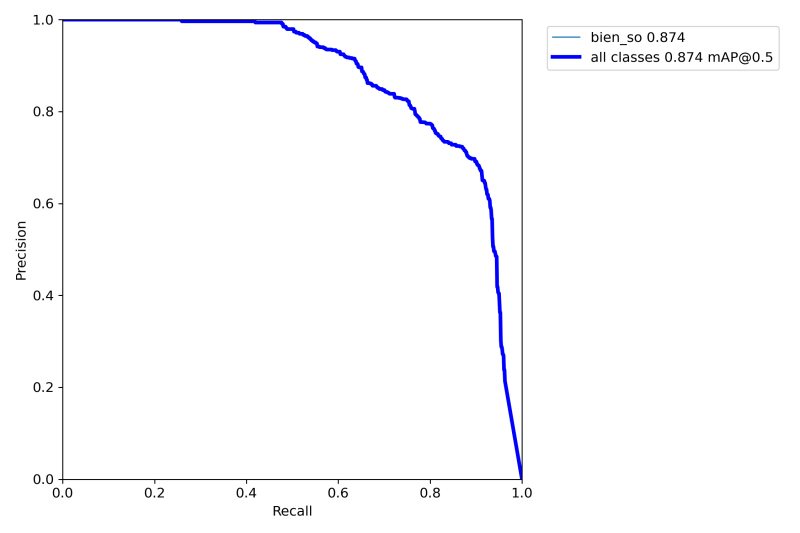





P_CURVE.PNG


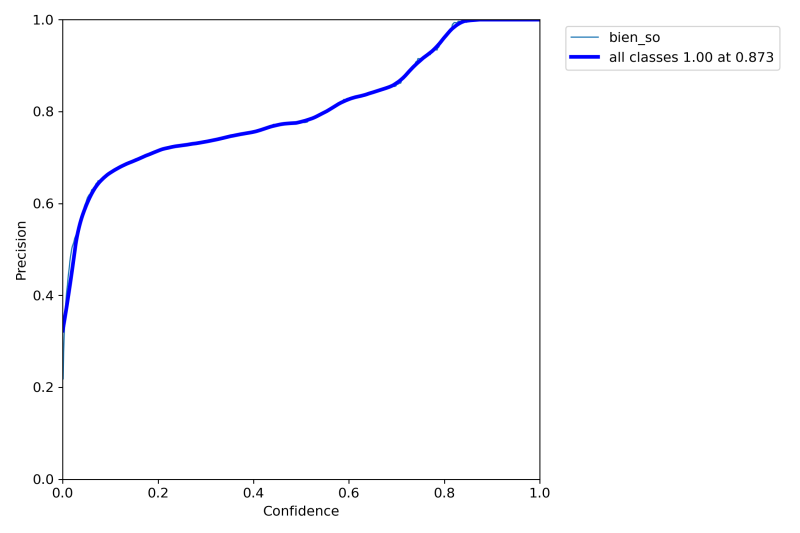





R_CURVE.PNG


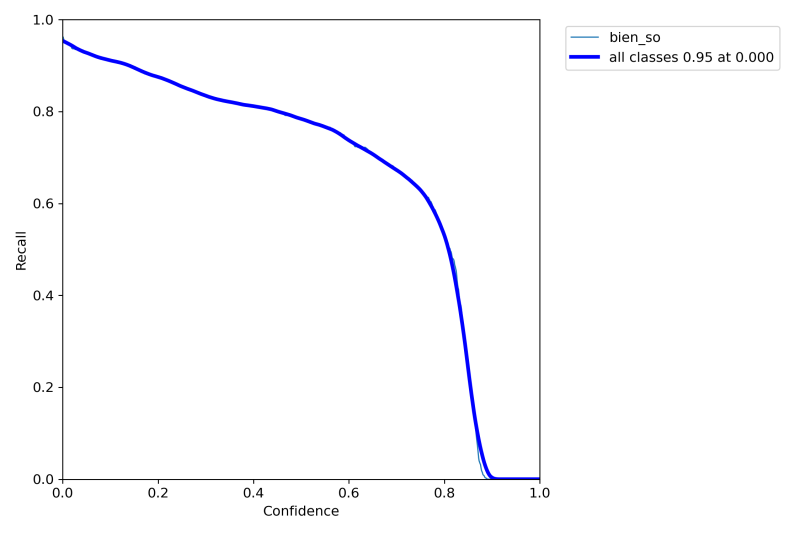





F1_CURVE.PNG


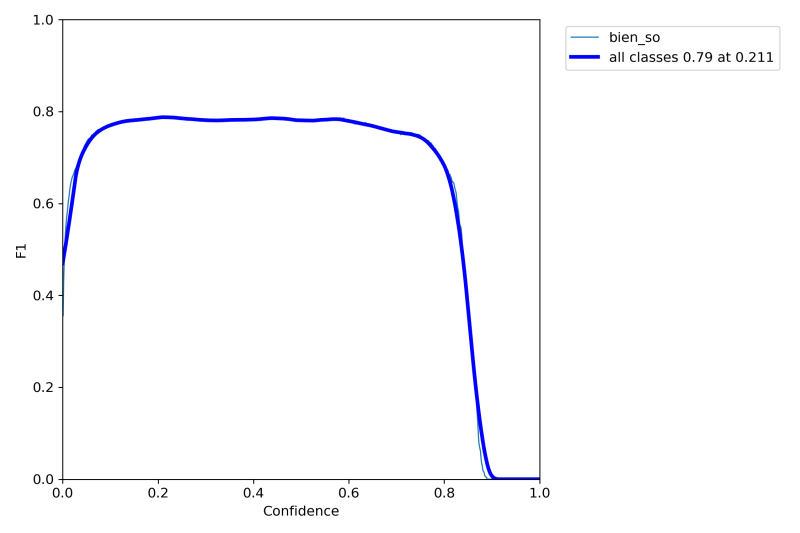





CONFUSION_MATRIX.PNG


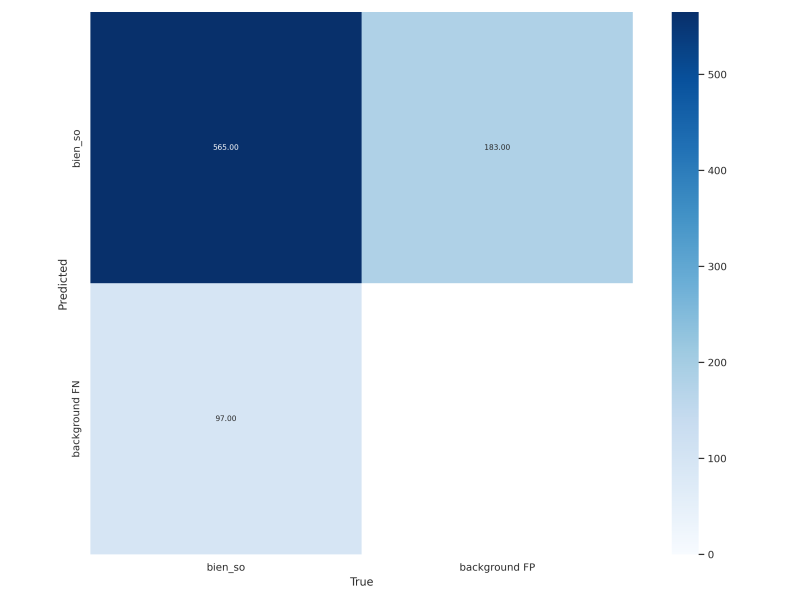

In [ ]:
for imageName in glob.glob('runs/val/exp2/*.png'):
    print(os.path.basename(imageName).upper())
    img = cv2.imread(imageName)
    img = imutils.resize(img, width=800)
    cv2_imshow(img)
    print('\n\n\n')

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --img 640 --source /content/drive/MyDrive/Pro_Cs114/testing-video.mp4
#img = cv2.imread('/content/yolov5/runs/detect/exp/red_plate_2.mp4')
#img = imutils.resize(img, width=1500)
#cv2_imshow(img)

detect: weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], source=/content/drive/MyDrive/Pro_Cs114/testing-video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=False, hide_conf=False, half=False, dnn=False
/content/yolov5/utils/torch_utils.py:75: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif not cpu and getattr(torch, 'has_mps', False) and torch.backends.mps.is_available():  # prefer MPS if available
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
video 1/1 (1/542) /content/drive/MyDrive/Pro_Cs114/tes

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt --censor --img 640 --source /content/drive/MyDrive/Pro_Cs114/testing-video.mp4
#img = cv2.imread('/content/yolov5/runs/detect/exp2/red_plate_2.mp4')
#img = imutils.resize(img, width=1500)
#cv2_imshow(img)

detect: weights=['/content/drive/MyDrive/Yolov5_censor_license_plate_config/1_label_best.pt'], source=/content/drive/MyDrive/Pro_Cs114/testing-video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=True, hide_conf=False, half=False, dnn=False
/content/yolov5/utils/torch_utils.py:75: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  elif not cpu and getattr(torch, 'has_mps', False) and torch.backends.mps.is_available():  # prefer MPS if available
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CPU

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
video 1/1 (1/542) /content/drive/MyDrive/Pro_Cs114/test